In [135]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [136]:
# Data initalization
accidentdf = pd.read_csv('archive/accidents_2005_to_2007.csv')

In [137]:
accidentdf.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,...,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,NaN,NaN,1.0,Yes,E01002849,2005.0
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,NaN,NaN,1.0,Yes,E01002909,2005.0
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,NaN,NaN,1.0,Yes,E01002857,2005.0
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,NaN,NaN,1.0,Yes,E01002840,2005.0
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,...,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,NaN,NaN,1.0,Yes,E01002863,2005.0


In [138]:
accidentdf['Road_Type'].unique()

array(['Single carriageway', 'Dual carriageway', 'One way street',
       'Roundabout', 'Slip road', 'Unknown', 'Single carriag'],
      dtype=object)

In [139]:
accidentdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258763 entries, 0 to 258762
Data columns (total 33 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Accident_Index                               258763 non-null  object 
 1   Location_Easting_OSGR                        258689 non-null  float64
 2   Location_Northing_OSGR                       258689 non-null  float64
 3   Longitude                                    258689 non-null  float64
 4   Latitude                                     258689 non-null  float64
 5   Police_Force                                 258763 non-null  int64  
 6   Accident_Severity                            258763 non-null  int64  
 7   Number_of_Vehicles                           258763 non-null  int64  
 8   Number_of_Casualties                         258763 non-null  int64  
 9   Date                                         258763 non-nul

In [140]:
# Exploration of data
df = accidentdf.drop(columns = ['Accident_Index','Location_Easting_OSGR',
                            'Location_Northing_OSGR','Date','LSOA_of_Accident_Location',
                            'Local_Authority_(District)','Local_Authority_(Highway)',
                            '1st_Road_Number','Longitude','Latitude',
                            '1st_Road_Class', 'Road_Type',
                            'Police_Force','Junction_Detail',
                            '2nd_Road_Class','2nd_Road_Number'
                            ])



In [141]:
df['Time'] = df['Time'].str.split(':').str[0]



In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258763 entries, 0 to 258762
Data columns (total 17 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Accident_Severity                            258763 non-null  int64  
 1   Number_of_Vehicles                           258763 non-null  int64  
 2   Number_of_Casualties                         258763 non-null  int64  
 3   Day_of_Week                                  258763 non-null  int64  
 4   Time                                         258733 non-null  object 
 5   Speed_limit                                  258762 non-null  float64
 6   Junction_Control                             156348 non-null  object 
 7   Pedestrian_Crossing-Human_Control            258747 non-null  object 
 8   Pedestrian_Crossing-Physical_Facilities      258732 non-null  object 
 9   Light_Conditions                             258762 non-nul

In [143]:
df

,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Time,Speed_limit,Junction_Control,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
0,2,1,1,3,17,30.0,NaN,None within 50 metres,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,NaN,NaN,1.0,Yes,2005.0
1,3,1,1,4,17,30.0,Automatic traffic signal,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,NaN,NaN,1.0,Yes,2005.0
2,3,2,1,5,00,30.0,NaN,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,NaN,NaN,1.0,Yes,2005.0
3,3,1,1,6,10,30.0,NaN,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,NaN,NaN,1.0,Yes,2005.0
4,3,1,1,2,21,30.0,NaN,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,NaN,NaN,1.0,Yes,2005.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258758,2,2,1,3,10,30.0,NaN,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,NaN,NaN,1.0,Yes,2006.0
258759,3,3,1,2,16,30.0,Giveway or uncontrolled,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,NaN,NaN,1.0,Yes,2006.0
258760,3,2,1,3,11,30.0,NaN,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,NaN,NaN,1.0,No,2006.0
258761,3,2,1,3,12,30.0,NaN,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,NaN,NaN,2.0,No,2006.0


In [144]:
df['Junction_Control'].unique()

array([nan, 'Automatic traffic signal', 'Giveway or uncontrolled',
       'Stop Sign', 'Authorised person'], dtype=object)

In [145]:
df['Junction_Control'].isna().mean()

np.float64(0.3957868783404119)

In [146]:
# Processing Speed Limit by binning
bins = [0, 30, 50, 70]
labels = ['Low', 'Medium', 'High']
df['Speed_limit'] = pd.cut(
    df['Speed_limit'],
    bins=bins,
    labels=labels,
    include_lowest=True
).cat.codes.replace(-1, np.nan)

In [147]:
#df

In [148]:
df['Junction_Control'].unique()

array([nan, 'Automatic traffic signal', 'Giveway or uncontrolled',
       'Stop Sign', 'Authorised person'], dtype=object)

In [149]:
df['Junction_Control'] = df['Junction_Control'].fillna('No junction')
df['Carriageway_Hazards'] = df['Carriageway_Hazards'].fillna('No Hazards')
df['Special_Conditions_at_Site'] = df['Special_Conditions_at_Site'].fillna('No special Conditions')

In [150]:
#df

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258763 entries, 0 to 258762
Data columns (total 17 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Accident_Severity                            258763 non-null  int64  
 1   Number_of_Vehicles                           258763 non-null  int64  
 2   Number_of_Casualties                         258763 non-null  int64  
 3   Day_of_Week                                  258763 non-null  int64  
 4   Time                                         258733 non-null  object 
 5   Speed_limit                                  258762 non-null  float64
 6   Junction_Control                             258763 non-null  object 
 7   Pedestrian_Crossing-Human_Control            258747 non-null  object 
 8   Pedestrian_Crossing-Physical_Facilities      258732 non-null  object 
 9   Light_Conditions                             258762 non-nul

In [152]:
df['Pedestrian_Crossing-Human_Control'].isna().sum()


np.int64(16)

In [153]:
df = df.dropna(subset=['Pedestrian_Crossing-Human_Control'])


In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 258747 entries, 0 to 258761
Data columns (total 17 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Accident_Severity                            258747 non-null  int64  
 1   Number_of_Vehicles                           258747 non-null  int64  
 2   Number_of_Casualties                         258747 non-null  int64  
 3   Day_of_Week                                  258747 non-null  int64  
 4   Time                                         258718 non-null  object 
 5   Speed_limit                                  258747 non-null  float64
 6   Junction_Control                             258747 non-null  object 
 7   Pedestrian_Crossing-Human_Control            258747 non-null  object 
 8   Pedestrian_Crossing-Physical_Facilities      258724 non-null  object 
 9   Light_Conditions                             258747 non-null  ob

In [155]:
#df

In [156]:
df['Pedestrian_Crossing-Physical_Facilities'].isna().sum()

np.int64(23)

In [157]:
df['Pedestrian_Crossing-Physical_Facilities'].unique()

array(['Zebra crossing', 'Pedestrian phase at traffic signal junction',
       'No physical crossing within 50 meters', 'Central refuge',
       'non-junction pedestrian crossing', 'Footbridge or subway', nan],
      dtype=object)

In [158]:
df = df.dropna(subset=['Pedestrian_Crossing-Physical_Facilities'])


In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 258724 entries, 0 to 258761
Data columns (total 17 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Accident_Severity                            258724 non-null  int64  
 1   Number_of_Vehicles                           258724 non-null  int64  
 2   Number_of_Casualties                         258724 non-null  int64  
 3   Day_of_Week                                  258724 non-null  int64  
 4   Time                                         258695 non-null  object 
 5   Speed_limit                                  258724 non-null  float64
 6   Junction_Control                             258724 non-null  object 
 7   Pedestrian_Crossing-Human_Control            258724 non-null  object 
 8   Pedestrian_Crossing-Physical_Facilities      258724 non-null  object 
 9   Light_Conditions                             258724 non-null  ob

In [160]:
df['Light_Conditions'].unique()

array(['Daylight: Street light present',
       'Darkness: Street lights present and lit',
       'Darkness: Street lighting unknown',
       'Darkness: Street lights present but unlit',
       'Darkeness: No street lighting'], dtype=object)

In [161]:
#Fixing Ty[p]
df['Light_Conditions'] = df['Light_Conditions'].replace(
    {'Darkeness: No street lighting': 'Darkness: No street lighting'}
)


In [162]:
df['Light_Conditions'].unique()

array(['Daylight: Street light present',
       'Darkness: Street lights present and lit',
       'Darkness: Street lighting unknown',
       'Darkness: Street lights present but unlit',
       'Darkness: No street lighting'], dtype=object)

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 258724 entries, 0 to 258761
Data columns (total 17 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Accident_Severity                            258724 non-null  int64  
 1   Number_of_Vehicles                           258724 non-null  int64  
 2   Number_of_Casualties                         258724 non-null  int64  
 3   Day_of_Week                                  258724 non-null  int64  
 4   Time                                         258695 non-null  object 
 5   Speed_limit                                  258724 non-null  float64
 6   Junction_Control                             258724 non-null  object 
 7   Pedestrian_Crossing-Human_Control            258724 non-null  object 
 8   Pedestrian_Crossing-Physical_Facilities      258724 non-null  object 
 9   Light_Conditions                             258724 non-null  ob

In [164]:
df['Weather_Conditions'].unique()

array(['Raining without high winds', 'Fine without high winds', 'Unknown',
       'Snowing without high winds', 'Other', 'Fine with high winds',
       'Raining with high winds', 'Fog or mist',
       'Snowing with high winds', nan], dtype=object)

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 258724 entries, 0 to 258761
Data columns (total 17 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Accident_Severity                            258724 non-null  int64  
 1   Number_of_Vehicles                           258724 non-null  int64  
 2   Number_of_Casualties                         258724 non-null  int64  
 3   Day_of_Week                                  258724 non-null  int64  
 4   Time                                         258695 non-null  object 
 5   Speed_limit                                  258724 non-null  float64
 6   Junction_Control                             258724 non-null  object 
 7   Pedestrian_Crossing-Human_Control            258724 non-null  object 
 8   Pedestrian_Crossing-Physical_Facilities      258724 non-null  object 
 9   Light_Conditions                             258724 non-null  ob

In [166]:
df['Time'].isna().sum()

np.int64(29)

In [167]:
df = df.dropna(subset=['Time'])

In [168]:
df['Weather_Conditions'].isna().sum()

np.int64(1)

In [169]:
df = df.dropna(subset=['Weather_Conditions'])

In [170]:
df['Road_Surface_Conditions'].isna().sum()

np.int64(263)

In [171]:
df['Road_Surface_Conditions'].unique()

array(['Wet/Damp', 'Dry', 'Frost/Ice', 'Snow',
       'Flood (Over 3cm of water)', nan], dtype=object)

In [172]:
df = df.dropna(subset=['Road_Surface_Conditions'])

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 258431 entries, 0 to 258761
Data columns (total 17 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Accident_Severity                            258431 non-null  int64  
 1   Number_of_Vehicles                           258431 non-null  int64  
 2   Number_of_Casualties                         258431 non-null  int64  
 3   Day_of_Week                                  258431 non-null  int64  
 4   Time                                         258431 non-null  object 
 5   Speed_limit                                  258431 non-null  float64
 6   Junction_Control                             258431 non-null  object 
 7   Pedestrian_Crossing-Human_Control            258431 non-null  object 
 8   Pedestrian_Crossing-Physical_Facilities      258431 non-null  object 
 9   Light_Conditions                             258431 non-null  ob

In [174]:
df['Did_Police_Officer_Attend_Scene_of_Accident'].unique()

array(['Yes', 'No', nan], dtype=object)

In [175]:
df['Did_Police_Officer_Attend_Scene_of_Accident'].isna().sum()

np.int64(814)

In [176]:
df = df.dropna(subset=['Did_Police_Officer_Attend_Scene_of_Accident'])

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 257617 entries, 0 to 258761
Data columns (total 17 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Accident_Severity                            257617 non-null  int64  
 1   Number_of_Vehicles                           257617 non-null  int64  
 2   Number_of_Casualties                         257617 non-null  int64  
 3   Day_of_Week                                  257617 non-null  int64  
 4   Time                                         257617 non-null  object 
 5   Speed_limit                                  257617 non-null  float64
 6   Junction_Control                             257617 non-null  object 
 7   Pedestrian_Crossing-Human_Control            257617 non-null  object 
 8   Pedestrian_Crossing-Physical_Facilities      257617 non-null  object 
 9   Light_Conditions                             257617 non-null  ob

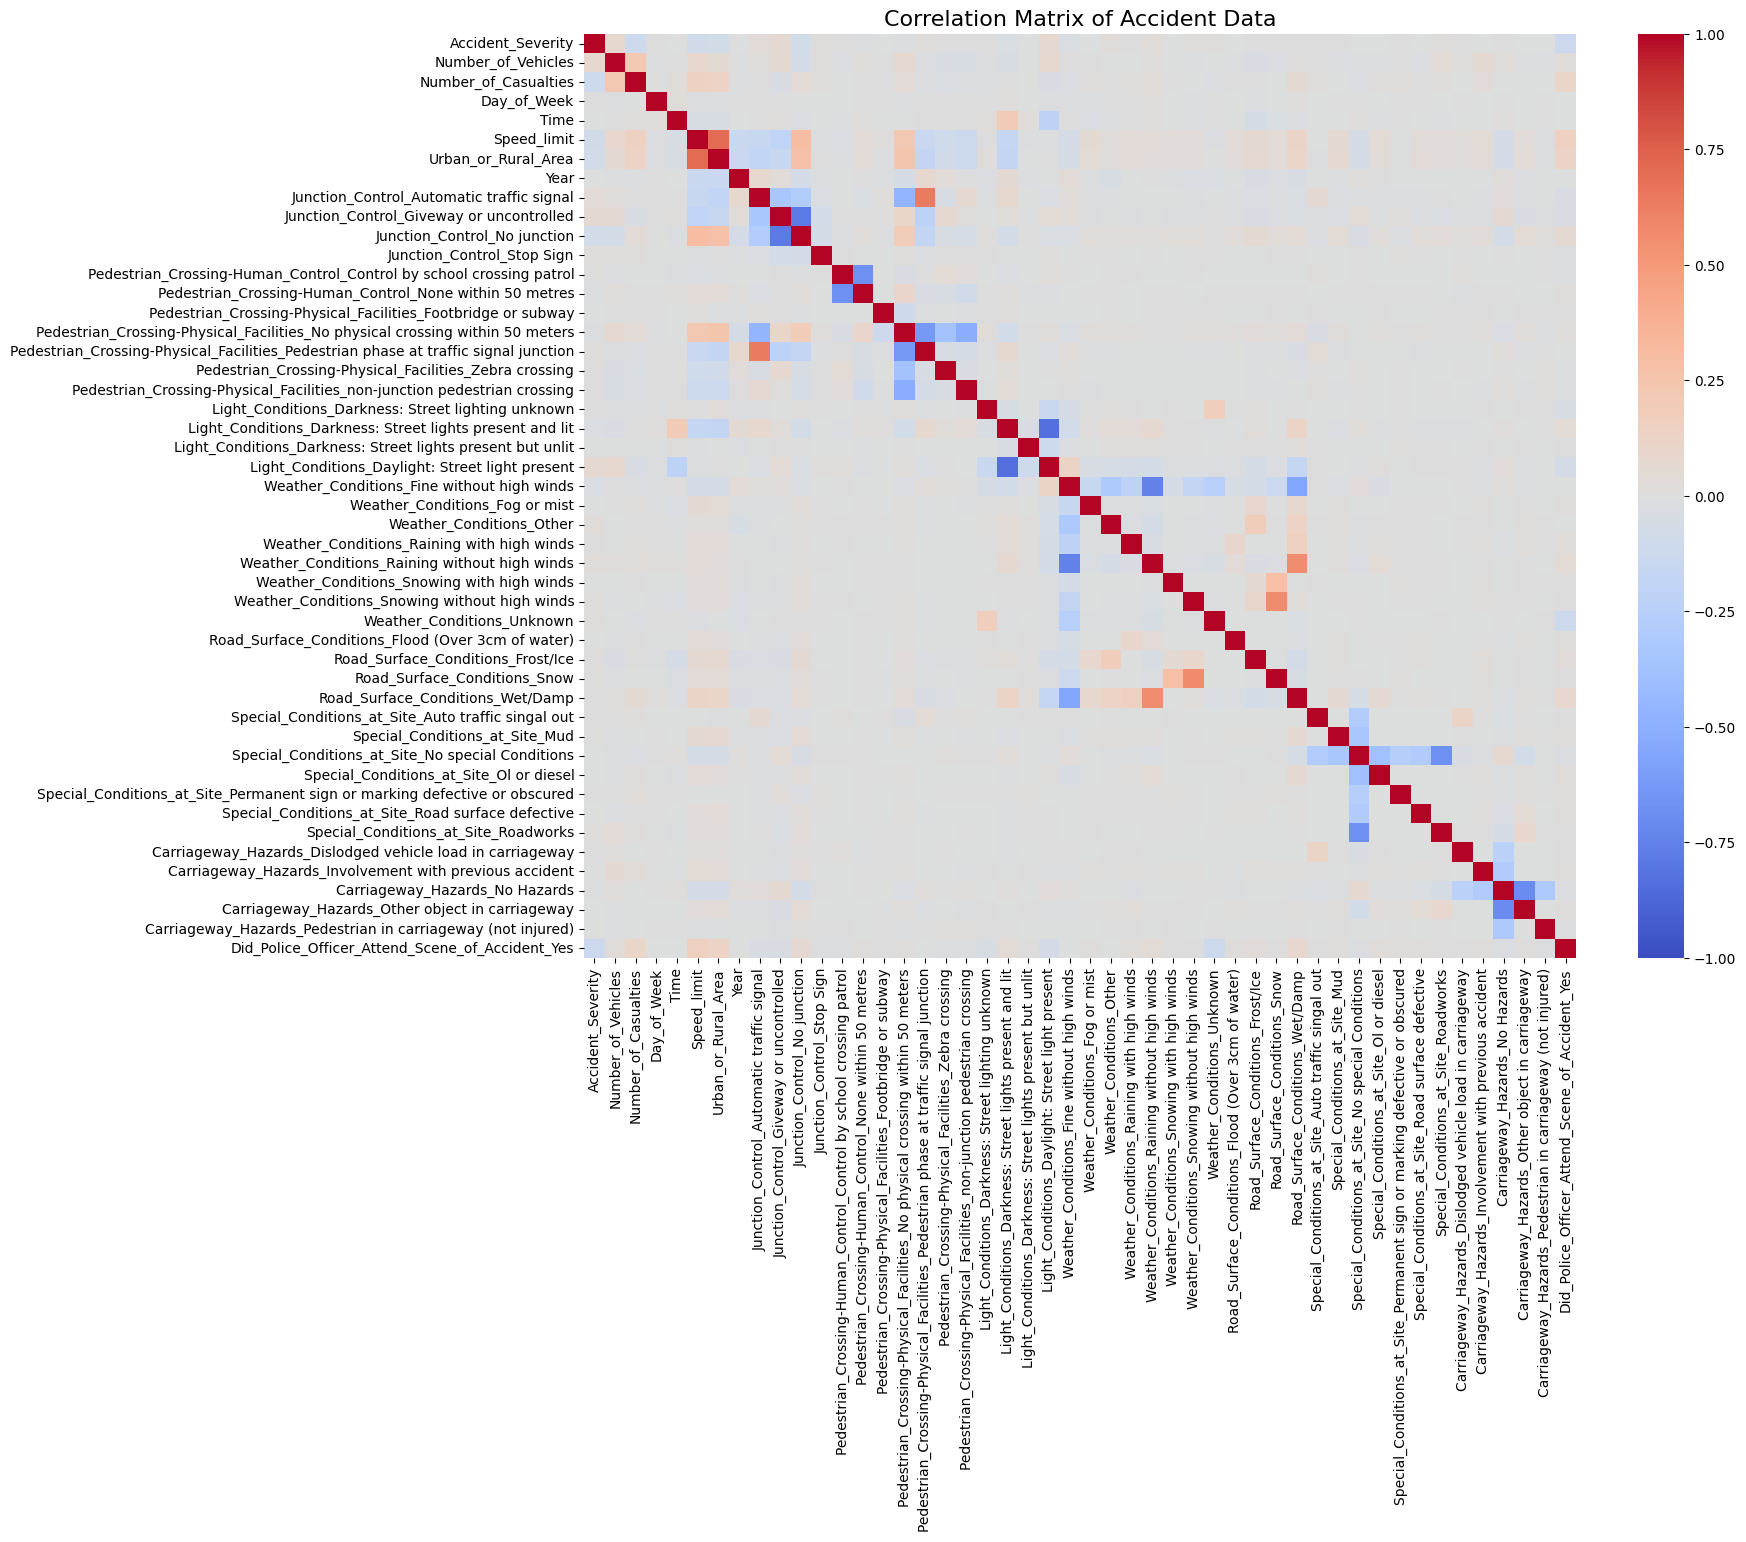

In [178]:
# Data Representation
import pandas as pd

# One-hot encode categorical columns
categorical_cols = [
    'Junction_Control',
    'Pedestrian_Crossing-Human_Control',
    'Pedestrian_Crossing-Physical_Facilities',
    'Light_Conditions',
    'Weather_Conditions',
    'Road_Surface_Conditions',
    'Special_Conditions_at_Site',
    'Carriageway_Hazards',
    'Did_Police_Officer_Attend_Scene_of_Accident'
]

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
corr_matrix = df_encoded.corr()



plt.figure(figsize=(16,12))
sns.heatmap(corr_matrix, cmap="coolwarm", center=0, annot=False, cbar=True, vmin = -1, vmax = 1)
plt.title("Correlation Matrix of Accident Data", fontsize=16)
plt.show()


<Axes: >

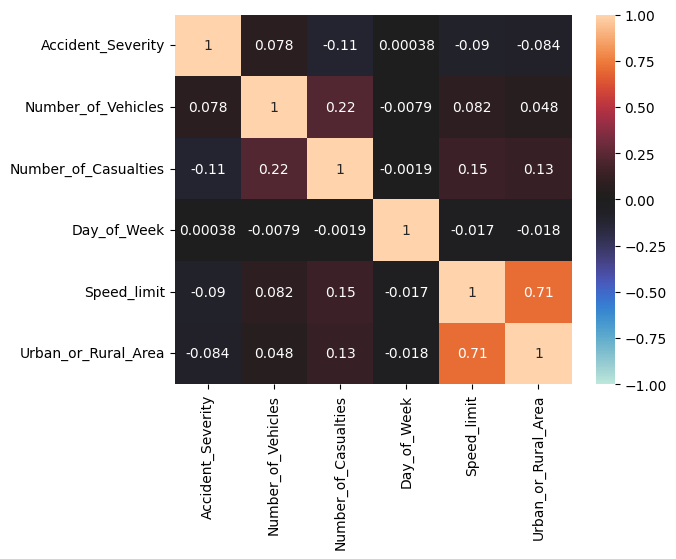

In [179]:


# Data Representation of our numeric values
sns.heatmap(df[['Accident_Severity','Number_of_Vehicles','Number_of_Casualties','Day_of_Week','Speed_limit','Urban_or_Rural_Area']].corr(), annot = True, vmin = -1, vmax = 1, center = 0)

<Axes: xlabel='Accident_Severity', ylabel='count'>

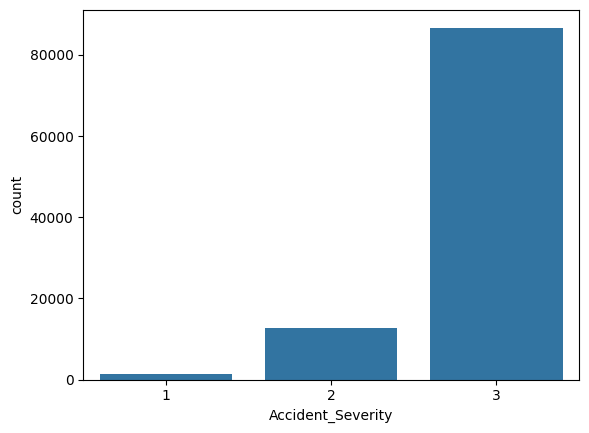

In [131]:
sns.countplot(x="Accident_Severity", data=df)

<Axes: xlabel='Number_of_Vehicles', ylabel='Number_of_Casualties'>

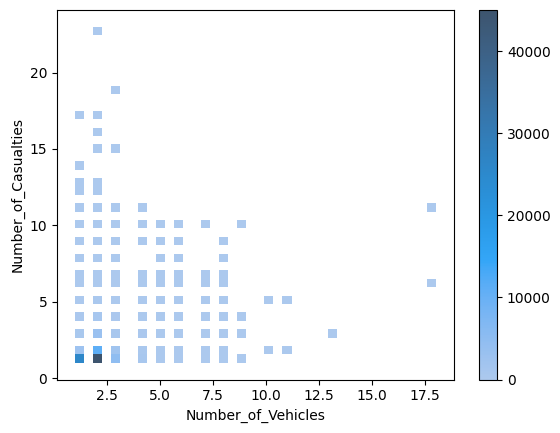

In [132]:
sns.histplot(data=df,x="Number_of_Vehicles", y="Number_of_Casualties",bins=40,cbar=True)

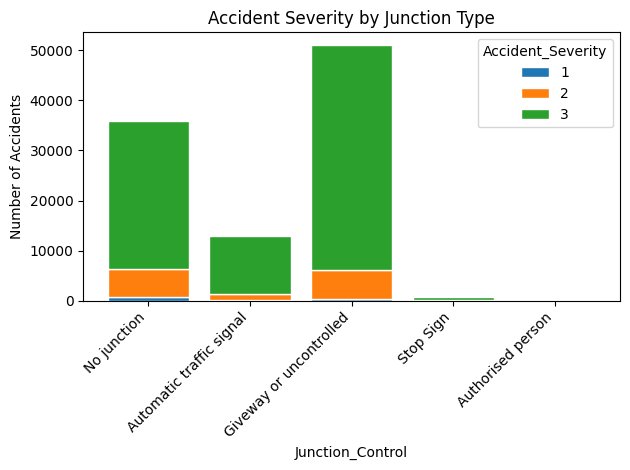

In [133]:
junctions = list(df['Junction_Control'].unique())
severities = sorted(list(df['Accident_Severity'].unique()))

x = np.arange(len(junctions))
bottom = np.zeros(len(junctions))
for i in severities:
    counts = []
    for j in junctions:
        counts.append(
            df[(df['Accident_Severity'] == i) & (df['Junction_Control'] == j)].shape[0]
        )
    plt.bar(x, counts, bottom=bottom, label=i, edgecolor='white', width=0.8)
    bottom = bottom + np.array(counts)

plt.xticks(x, junctions, rotation=45, ha='right')
plt.xlabel('Junction_Control')
plt.ylabel('Number of Accidents')
plt.title('Accident Severity by Junction Type')
plt.legend(title='Accident_Severity')
plt.tight_layout()
plt.show()

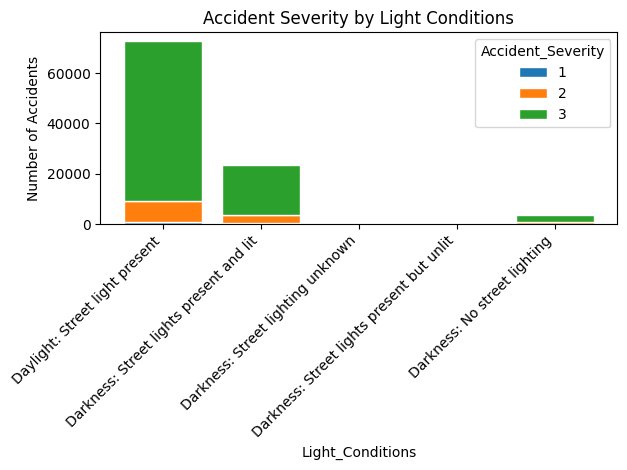

In [134]:
light = list(df['Light_Conditions'].unique())
severities = sorted(list(df['Accident_Severity'].unique()))

x = np.arange(len(junctions))
bottom = np.zeros(len(junctions))
for i in severities:
    counts = []
    for j in light:
        counts.append(
            df[(df['Accident_Severity'] == i) & (df['Light_Conditions'] == j)].shape[0]
        )
    plt.bar(x, counts, bottom=bottom, label=i, edgecolor='white', width=0.8)
    bottom = bottom + np.array(counts)

plt.xticks(x, light, rotation=45, ha='right')
plt.xlabel('Light_Conditions')
plt.ylabel('Number of Accidents')
plt.title('Accident Severity by Light Conditions')
plt.legend(title='Accident_Severity')
plt.tight_layout()
plt.show()
